# Russell Data CLeaning and EDA

## Imports and Helper functions

In [1]:
from warnings import simplefilter
simplefilter(action='ignore')

from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
import numpy as np
import sympy as sympy
import time
import enum
import ast
import json
from google.colab import drive
from pathlib import Path
import cv2, matplotlib.pyplot as plt
import random


In [2]:
# Mount the Google Drive at /content/drive
drive.mount('/content/drive')

#Read both csv files into pandas dataframes
train_annotations = pd.read_csv("/content/drive/MyDrive/ADS2002 PROJECT/train_annotations.csv")
train_data = pd.read_csv("/content/drive/MyDrive/ADS2002 PROJECT/train.csv")

# Merge on 'StudyInstanceUID' to add the PatientID column
df = train_annotations.merge(train_data[['StudyInstanceUID', 'PatientID']], on='StudyInstanceUID', how='left')

#Convert string to list of lists in data column
df['data'] = df['data'].apply(lambda x: ast.literal_eval(x))

#Drop all rows which are incompletely imaged NGTs or Swan Ganz catheters
df = df[~df['label'].isin(['NGT - Incompletely Imaged', 'Swan Ganz Catheter Present'])]

Mounted at /content/drive


In [3]:
#Clean method to return all the image IDs of a given patient ID
def returnAllPatientImages(patient):
    return(list(train_data[train_data["PatientID"]==patient]["StudyInstanceUID"]))

## Data Cleanining and Integrity Checking

In [4]:
train_data = pd.read_csv(path + "train.csv")
train_data

NameError: name 'path' is not defined

In [5]:
train_data.isna().sum()

,0
StudyInstanceUID,0
ETT - Abnormal,0
ETT - Borderline,0
ETT - Normal,0
NGT - Abnormal,0
NGT - Borderline,0
NGT - Incompletely Imaged,0
NGT - Normal,0
CVC - Abnormal,0
CVC - Borderline,0


In [6]:
train_data["PatientID"].describe()

,PatientID
count,30083
unique,3255
top,05029c63a
freq,172


## EDA

In [7]:
#Counts the number of patients
train_data["PatientID"].unique().size

3255

Despite there being about 30,000 rows in the table, there are only about 3255 patients. This means that paints will the multiple images of them with varying data points. There are ~9 images per patitent. Lets look further into this.

In [8]:
#Groups the table to log the number of occurrences of each patient
frequencies = pd.DataFrame(train_data.groupby(by="PatientID")["PatientID"].count())
frequencies.rename(columns={"PatientID":"Count"}, inplace=True)

In [9]:
display(frequencies.sort_values(by="Count", ascending=False))
singleImagePatients = frequencies[frequencies["Count"]==1]
mt10ImagePatients = frequencies[frequencies["Count"]>10]
print(f"{singleImagePatients.size} patients have only 1 image")
print(f"{mt10ImagePatients.size} patients have more than 10 images")

,Count
PatientID,
05029c63a,172
55073fece,167
26da0d5ad,148
8849382d0,130
34242119f,110
...,...
0651366c7,1
064cc6523,1
e001492d4,1


397 patients have only 1 image
800 patients have more than 10 images


Knowing this, let's take a look at the patient with the most entries to see if we can root out any stories or patters. How might these catherters change over time in a single patient?

In [10]:
mostImagedPatient = train_data[train_data["PatientID"]=="05029c63a"]
dataToDisplay = mostImagedPatient.sort_values(by= "ETT - Normal")

#Bypasses maximum row limit
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dataToDisplay)

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
1206,1.2.826.0.1.3680043.8.498.68620140014200110095...,0,0,0,0,0,0,0,0,0,1,1,05029c63a
2226,1.2.826.0.1.3680043.8.498.74190045333565570017...,0,1,0,0,0,0,1,0,0,1,1,05029c63a
4828,1.2.826.0.1.3680043.8.498.74338185865293989379...,0,1,0,0,0,0,1,0,0,1,0,05029c63a
10253,1.2.826.0.1.3680043.8.498.81612968658469626927...,0,0,0,0,0,0,0,0,0,1,1,05029c63a
10367,1.2.826.0.1.3680043.8.498.89784585798061898325...,0,1,0,0,0,0,1,0,0,1,1,05029c63a
8580,1.2.826.0.1.3680043.8.498.95986923920930940143...,0,0,0,0,0,0,0,0,0,1,0,05029c63a
17329,1.2.826.0.1.3680043.8.498.51595082650400612709...,0,0,0,0,0,0,0,0,0,1,1,05029c63a
12933,1.2.826.0.1.3680043.8.498.61936035308630680796...,0,1,0,0,0,0,0,0,1,0,0,05029c63a
14245,1.2.826.0.1.3680043.8.498.93518520610058188214...,0,0,0,0,0,0,1,0,0,0,0,05029c63a
16180,1.2.826.0.1.3680043.8.498.20308463414598007724...,0,1,0,0,0,0,1,0,1,1,0,05029c63a


In [11]:
#This is to analyse a list of all the images of the most-imaged patient
returnAllPatientImages("05029c63a")

['1.2.826.0.1.3680043.8.498.33289872132944517059685300521052847970',
 '1.2.826.0.1.3680043.8.498.58815494070381425972841494897309562888',
 '1.2.826.0.1.3680043.8.498.18423562395321282202151467283211883687',
 '1.2.826.0.1.3680043.8.498.80010847260848855758249955549927520930',
 '1.2.826.0.1.3680043.8.498.68620140014200110095088585785330951729',
 '1.2.826.0.1.3680043.8.498.87375315768078677164756022968175911741',
 '1.2.826.0.1.3680043.8.498.99564257536158506118998101216918000997',
 '1.2.826.0.1.3680043.8.498.43908356782442779725424825386043768718',
 '1.2.826.0.1.3680043.8.498.51991674554454729241003433645598796537',
 '1.2.826.0.1.3680043.8.498.78021892236561877580290458242105043659',
 '1.2.826.0.1.3680043.8.498.86537162817021158811092283918656005072',
 '1.2.826.0.1.3680043.8.498.11525667914743618624335995337909956877',
 '1.2.826.0.1.3680043.8.498.12682264367523788590209252628203092871',
 '1.2.826.0.1.3680043.8.498.74190045333565570017428818377245264093',
 '1.2.826.0.1.3680043.8.498.294983

Let's look at a simple patient, maybe just one in a middle with only 7 images (01a6602b8)

In [12]:
mostImagedPatient = train_data[train_data["PatientID"]=="01a6602b8"]
dataToDisplay = mostImagedPatient

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dataToDisplay)

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
3547,1.2.826.0.1.3680043.8.498.13368586175752823546...,0,0,0,0,0,0,0,0,0,1,0,01a6602b8
3834,1.2.826.0.1.3680043.8.498.92443648275106206350...,0,0,0,0,0,0,0,0,0,1,0,01a6602b8
18199,1.2.826.0.1.3680043.8.498.48575077712160297418...,0,0,0,0,0,0,0,0,1,0,0,01a6602b8
20679,1.2.826.0.1.3680043.8.498.38434326028461648396...,0,0,0,0,0,0,0,0,0,1,0,01a6602b8
22063,1.2.826.0.1.3680043.8.498.32265506210757468088...,0,0,0,0,0,0,0,0,0,1,0,01a6602b8
22775,1.2.826.0.1.3680043.8.498.70674394161629430460...,0,0,0,0,0,0,0,0,0,1,0,01a6602b8
30081,1.2.826.0.1.3680043.8.498.95092491950130838685...,0,0,0,0,0,0,0,0,1,0,0,01a6602b8


In [13]:
frequencies[frequencies["Count"]==7]

,Count
PatientID,
018864234,7
01a6602b8,7
01e3dc988,7
01fa2ad89,7
0261d55c1,7
...,...
fc4269a27,7
fcc1c2dfc,7
fce6e7380,7


In [14]:
mostImagedPatient = train_data[train_data["PatientID"]=="ff826cf51"]
dataToDisplay = mostImagedPatient

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dataToDisplay)

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
9054,1.2.826.0.1.3680043.8.498.85888286754526046422...,0,0,0,0,0,0,0,0,0,1,0,ff826cf51
16211,1.2.826.0.1.3680043.8.498.50804831665099230965...,0,0,0,0,0,0,0,0,0,1,0,ff826cf51
17344,1.2.826.0.1.3680043.8.498.29983487174552869646...,0,0,1,0,0,1,0,0,0,1,0,ff826cf51
17658,1.2.826.0.1.3680043.8.498.73750776498365697385...,0,0,1,0,0,0,1,0,0,1,0,ff826cf51
18146,1.2.826.0.1.3680043.8.498.12722241245555310535...,0,0,1,0,0,0,1,0,0,1,0,ff826cf51
20747,1.2.826.0.1.3680043.8.498.65803857161092450324...,0,0,1,0,0,1,0,0,0,1,0,ff826cf51
25717,1.2.826.0.1.3680043.8.498.12724690186666099182...,0,0,0,0,0,0,0,0,1,0,0,ff826cf51


After taking a peek at some of the patients with only a few images, it can be seen that most images are focused on CVC caherters. Additionally, the CVC catherters seem to bounce back and forth a lot betwtween normal and bordeline and sometimes abnormal. There are two possible conjectures, since there is no record of time between these photos: <br><br>
1] The catherters move about and can change betwwen normal and borerline between images <br>
2] Chaterters start borderline or normal until an event or action which displaces them into another state, in which they stay until disturbed agian.

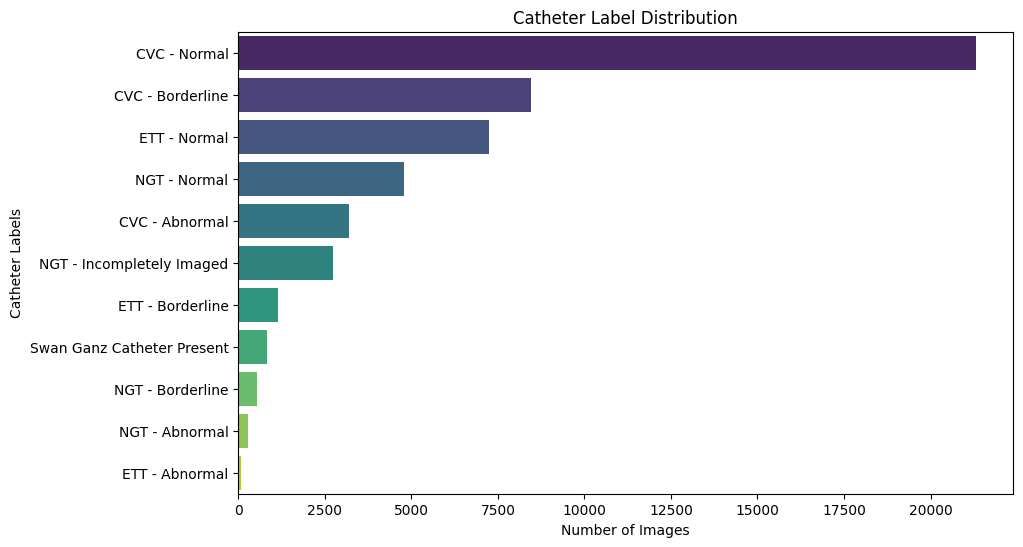

In [15]:
label_cols = [col for col in train_data.columns if col not in ['StudyInstanceUID', 'PatientID']]

# count per label
label_counts = train_data[label_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.values, y=label_counts.index, palette="viridis")
plt.title("Catheter Label Distribution")
plt.xlabel("Number of Images")
plt.ylabel("Catheter Labels")
plt.show()

Above is the distribution of catheter labels.
I decided to look into this to see if there are any class imbalances, which may cause our model to overfit to the comon labels and ignore the rarer ones like ETT abnormal.

Based on this, I think we'll need to handle the imbalance by oversampling the rarer cases and undersampling the more common cases.

Insight-wise, I think it's good to see that there are less abnormal placements of the catheters! XD

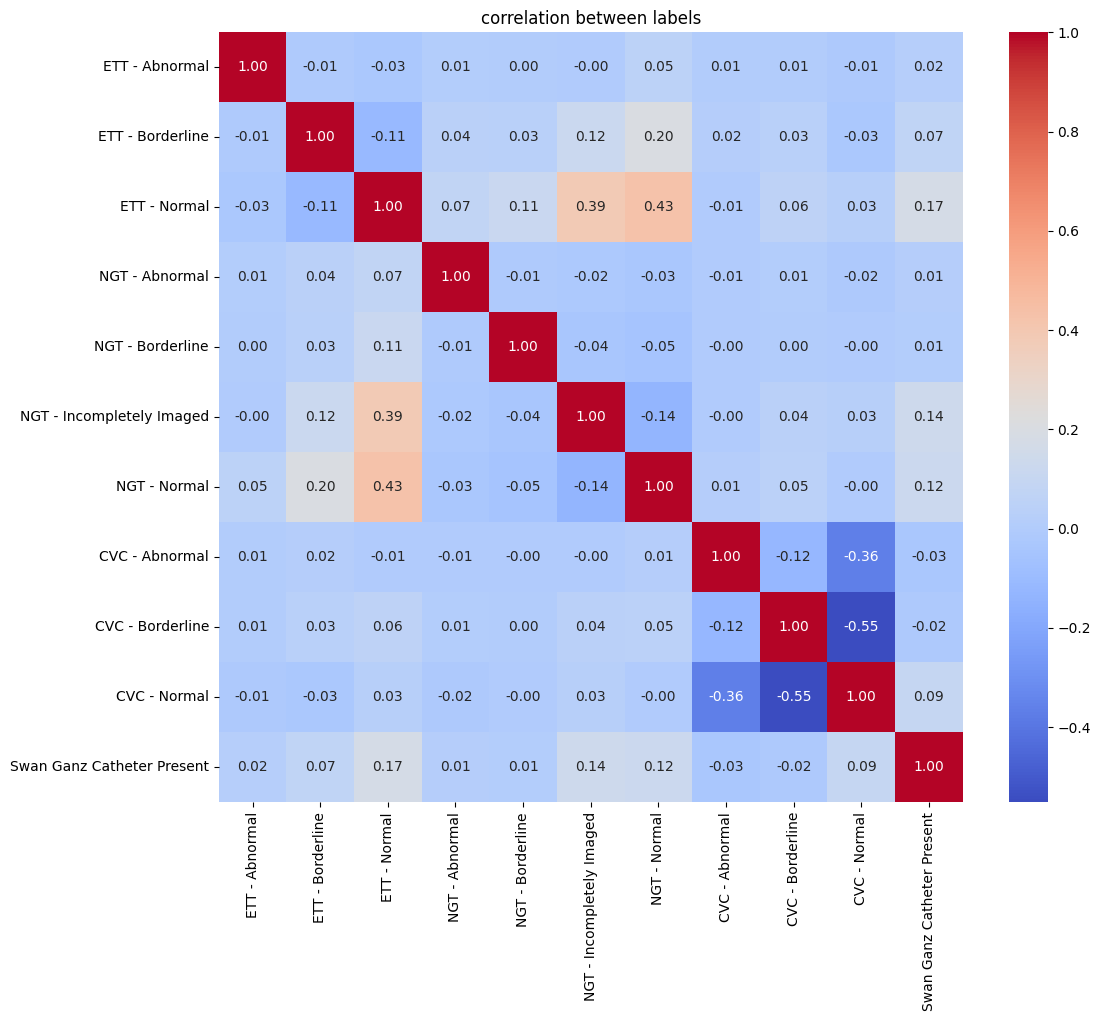

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(train_data[label_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("correlation between labels")
plt.show()

Above is a heatmap to show the correlation between the labels of the catheters.

The importance of this is to see which catheter types typically occur together and see if some are mutually exclusive.

Thankfully most boxes are blue... which makes things less complicated for us!

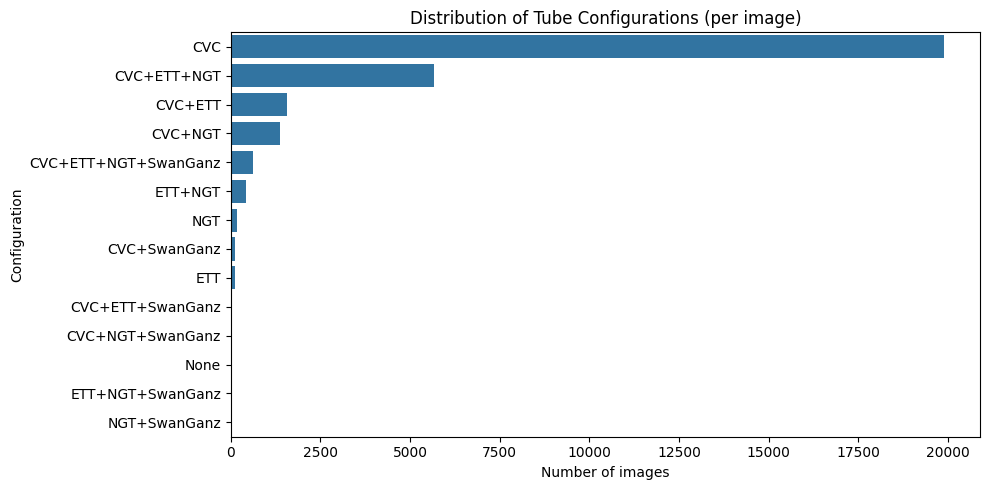

,count
CVC,19894
CVC+ETT+NGT,5675
CVC+ETT,1580
CVC+NGT,1365
CVC+ETT+NGT+SwanGanz,613
ETT+NGT,433
NGT,175
CVC+SwanGanz,131
ETT,107
CVC+ETT+SwanGanz,39


In [17]:
ETT_present = (train_data[['ETT - Normal','ETT - Borderline','ETT - Abnormal']].sum(axis=1) > 0)
NGT_present = (train_data[['NGT - Normal','NGT - Borderline','NGT - Abnormal','NGT - Incompletely Imaged']].sum(axis=1) > 0)
CVC_present = (train_data[['CVC - Normal','CVC - Borderline','CVC - Abnormal']].sum(axis=1) > 0)
SG_present  = train_data['Swan Ganz Catheter Present'].astype(bool)

present_df = pd.DataFrame({
    'ETT': ETT_present,
    'NGT': NGT_present,
    'CVC': CVC_present,
    'SwanGanz': SG_present
}, index=train_data.index)

# ----- make a configuration label per image, e.g. "CVC+ETT" or "NGT only" -----
def label_config(row):
    devices = [d for d, v in row.items() if v]
    if not devices:
        return 'None'
    return '+'.join(sorted(devices))

configs = present_df.apply(label_config, axis=1)
cfg_counts = configs.value_counts().sort_values(ascending=False)

# ----- bar chart -----
plt.figure(figsize=(10,5))
sns.barplot(x=cfg_counts.values, y=cfg_counts.index)
plt.title("Distribution of Tube Configurations (per image)")
plt.xlabel("Number of images")
plt.ylabel("Configuration")
plt.tight_layout()
plt.show()

# Optional: show the top N rows as a table
cfg_counts.head(15)

Above shows the distribution of tube configurations per image. I did this to observe the types of catheters that appear in the images, and whether one or more often appear together, and to see whether there was an imbalance that might impact our model or not.

I think there are definitely imbalances, which we will need to take into account when working with the models later on. We also see that patients may have more than just 1 tube, which tells us that we need multi-label classification.

Realistically, we'll have to look at the combinations instead of just by the labels of each catheter.

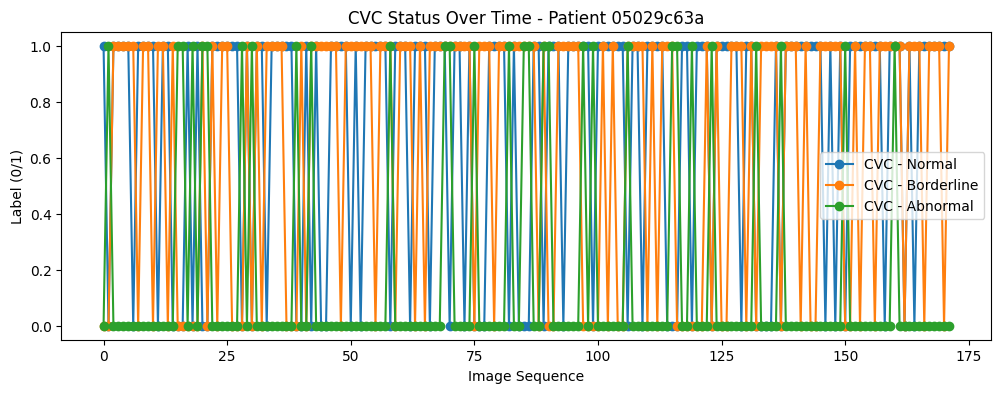

In [27]:
def plot_patient_timeline(patient_id):
    patient_df = train_data[train_data['PatientID'] == patient_id].copy()
    patient_df.reset_index(drop=True, inplace=True)

    plt.figure(figsize=(12,4))
    for label in ['CVC - Normal', 'CVC - Borderline', 'CVC - Abnormal']:
        plt.plot(patient_df.index, patient_df[label], marker='o', label=label)

    plt.title(f"CVC Status Over Time - Patient {patient_id}")
    plt.xlabel("Image Sequence")
    plt.ylabel("Label (0/1)")
    plt.legend()
    plt.show()

plot_patient_timeline("05029c63a")

Above shows the code/plot for one patient's CVC status over time. This is important because we can see how the catheter placement changes over time, which in turn will allow us to see that there is a lot of movement.

I think this is important bc it will remind us to take this into account when we proceed onto the modelling aspect of this project.

I only did it for CVC because its the most recurring catheter type. Feel free to do more if you want to.

Additionally, looking at it from an 'in practice' sort of way, I think we can say that abnormal or misplaces catheters are quickly corrected. This is bc the abnormal events happen in short bursts.

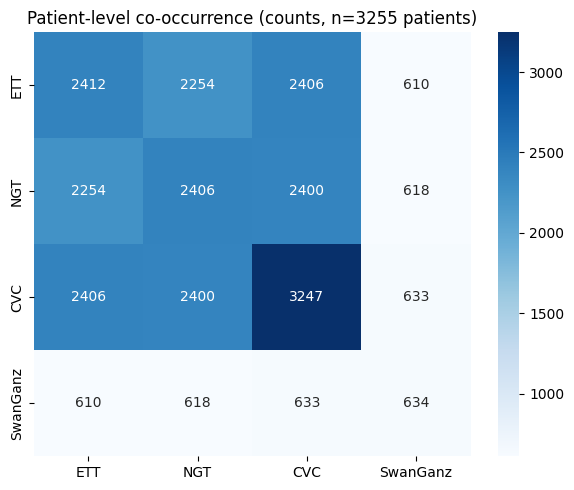

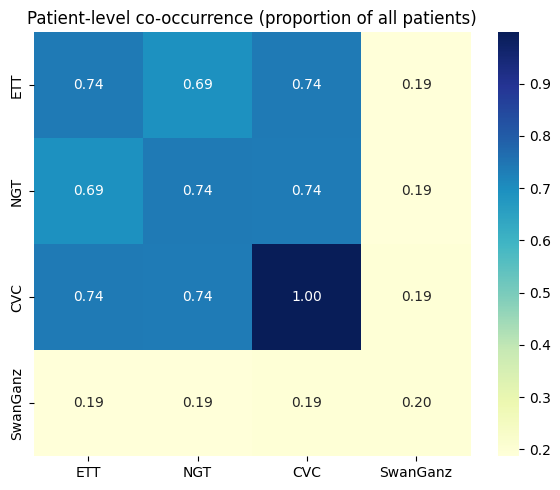

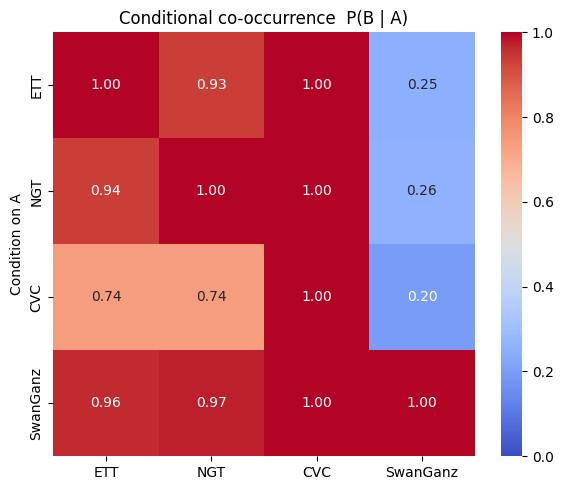

In [28]:
devices = ["ETT", "NGT", "CVC", "SwanGanz"]

tmp = present_df.copy()
tmp["PatientID"] = train_data["PatientID"]

# group by patient and take OR (any) over images -> 1 if ever present
per_patient = (
    tmp.groupby("PatientID")[devices]
      .any()
      .astype(int) # 1/0 instead of T/F
)

# build a co-occurrence count table
# counts[A,B] = number of patients who have both A and B
co_counts = pd.DataFrame(0, index=devices, columns=devices, dtype=int)
for a in devices:
    for b in devices:
        both = (per_patient[a] == 1) & (per_patient[b] == 1)
        co_counts.loc[a, b] = int(both.sum())

# proportion of all patients (just divide by total patients)
n_pat = len(per_patient)
co_prop_all = (co_counts / n_pat).round(3)

# conditional probability P(B|A): among patients with A, how many also have B
co_cond = pd.DataFrame(index=devices, columns=devices, dtype=float)
for a in devices:
    denom = (per_patient[a] == 1).sum()
    if denom == 0:
        co_cond.loc[a] = 0.0
    else:
        co_cond.loc[a] = (co_counts.loc[a] / denom).round(3)

# plot the three heatmaps
plt.figure(figsize=(6,5))
sns.heatmap(co_counts, annot=True, fmt="d", cmap="Blues")
plt.title(f"Patient-level co-occurrence (counts, n={n_pat} patients)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(co_prop_all, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Patient-level co-occurrence (proportion of all patients)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(co_cond.astype(float), annot=True, fmt=".2f", cmap="coolwarm", vmin=0, vmax=1)
plt.title("Conditional co-occurrence  P(B | A)")
plt.ylabel("Condition on A")
plt.tight_layout()
plt.show()